# 0.3.4 Particionamiento de los datos en crossvalidation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import math
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append("../../../../") 

import utils.paths as path
from utils.paths2 import direcciones

Los resultados de la evaluación de los modelos es dependiente de los datos usados. En la práctica, los datos se suelen partir en tres conjuntos, tal como muestra la gráfica de abajo:

- Conjunto de calibración de parámetros del modelo.

- Conjunto de prueba, usado comunmente para determinar la complejidad del modelo o el valor óptimo de alguno de sus parámetros.

- Conjunto de pronóstico, en el que se intenta reproducir el comportamiento del modelo en productivo.

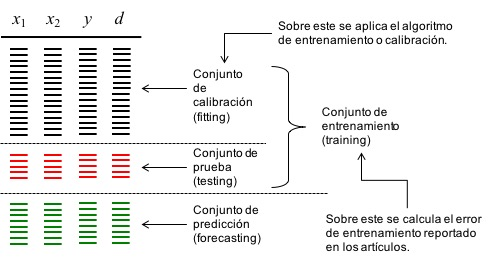

En la figura anterior, los datos se dividen secuencialmente, pero podría construirse cada conjunto aletaoriamente.

Si se tiene en cuenta que hay muchas particiones aleatorias posibles, una mejor estimación de la matriz de confusión (o cualquier otro estadístico que se calcule para un conjunto de datos) podría ser tomando los valores esperados de cada métrica. Es decir, si se repite el experimento N veces, se tendrían N valores posibles para cada uno de los elementos de la matriz de confusión y por lo tanto se podría tener su valor medio. Esta sería una métrica mucho más apropiada.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

## 0.3.4.1 Uso básico de las técnicas

In [4]:
X, y = make_moons(
    n_samples=20,
    shuffle=False,
    noise=None,
    random_state=12345,
)

display(
    X,
    y,
)


array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.39692621e-01,  3.42020143e-01],
       [ 7.66044443e-01,  6.42787610e-01],
       [ 5.00000000e-01,  8.66025404e-01],
       [ 1.73648178e-01,  9.84807753e-01],
       [-1.73648178e-01,  9.84807753e-01],
       [-5.00000000e-01,  8.66025404e-01],
       [-7.66044443e-01,  6.42787610e-01],
       [-9.39692621e-01,  3.42020143e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [ 0.00000000e+00,  5.00000000e-01],
       [ 6.03073792e-02,  1.57979857e-01],
       [ 2.33955557e-01, -1.42787610e-01],
       [ 5.00000000e-01, -3.66025404e-01],
       [ 8.26351822e-01, -4.84807753e-01],
       [ 1.17364818e+00, -4.84807753e-01],
       [ 1.50000000e+00, -3.66025404e-01],
       [ 1.76604444e+00, -1.42787610e-01],
       [ 1.93969262e+00,  1.57979857e-01],
       [ 2.00000000e+00,  5.00000000e-01]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [5]:
#
# Se train_test_split para particionar los datos
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=5,
    random_state=12345,
)


#
# Se crea un esquema de partición de los datos
# para usar crossvalidation
#
from sklearn.model_selection import KFold

kFold = KFold(n_splits=5)

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

#
# Se crea el modelo y se usa el cv seleccionado
#
from sklearn.model_selection import cross_val_score

clf = LogisticRegressionCV(
    Cs=10,
    cv=kFold,
    random_state=0,
)

clf.fit(X_train, y_train)

#
# Se usa el conjunto de prueba para analizar la
# generalización del modelo
#
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

display(
    accuracy_score(y_train, y_train_pred),
    accuracy_score(y_test, y_test_pred),
)

0.7333333333333333

1.0

In [6]:
print('ok_')

ok_
